<a href="https://colab.research.google.com/github/MrShiroLu/Kimya-Tesisinde-Reaksiyon-Suresi-ve-Sicaklik-Ayari/blob/main/Kimya_Tesisinde_Reaksiyon_Suresi_ve_Sicaklik_Ayari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Adınız: Burak
- Soyadınız: ARTUN
- Okul Numaranız: 2312729005
- GitHub Repo Bağlantısı: [Kimya-Tesisinde-Reaksiyon-Suresi-ve-Sicaklik-Ayari](https://github.com/MrShiroLu/Kimya-Tesisinde-Reaksiyon-Suresi-ve-Sicaklik-Ayari)

# Genetik Algoritma ile Kimya Tesisi Optimizasyonu

## Reaksiyon Süresi ve Sıcaklık Ayarı

Bu çalışmada, kimyasal üretim sürecinde reaksiyon verimi maksimize edilecektir. Çözüm yöntemi olarak **Genetik Algoritma (GA)** kullanılmaktadır.

### Problem Tanımı

Kimyasal üretimde reaksiyon süresi ve sıcaklık ayarı sonucu verimi etkiliyor.

### Amaç Fonksiyonu (Maksimizasyon)
$$y = 8x_1 + 3x_2 - x_1x_2 + x_1^2$$

### Karar Değişkenleri
- $x_1$: Reaksiyon süresi (dk) → [10, 60]
- $x_2$: Sıcaklık (°C) → [40, 120]

### Kısıtlar
- $x_1 + x_2 \leq 140$ (Güvenlik kısıtı)
- $x_2 \geq 60$ (Minimum sıcaklık)

### Genetik Algoritma Yapısı
- **Kromozom**: [x1, x2] - gerçek değerli kodlama
- **Fitness**: Amaç fonksiyonu + ceza fonksiyonu
- **Seçim**: Turnuva seçimi
- **Çaprazlama**: BLX-alpha crossover
- **Mutasyon**: Gaussian mutasyon

## 1. Gerekli Kütüphaneler

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import warnings
import random
import time

warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

print("Kütüphaneler yüklendi!")

Kütüphaneler yüklendi!


## 2. Problem Tanımlaması ve Amaç Fonksiyonu

In [2]:
# ============================================================
# PROBLEM PARAMETRELERİ
# ============================================================

# Değişken sınırları (bounds)
X1_MIN, X1_MAX = 10, 60    # Reaksiyon süresi (dk)
X2_MIN, X2_MAX = 40, 120   # Sıcaklık (°C)

BOUNDS = [(X1_MIN, X1_MAX), (X2_MIN, X2_MAX)]

# ============================================================
# AMAÇ FONKSİYONU
# ============================================================

def objective_function(x):
    """
    Reaksiyon verimi fonksiyonu (MAKSİMİZASYON)
    y = 8*x1 + 3*x2 - x1*x2 + x1^2

    Parametreler:
    x[0] = x1 : Reaksiyon süresi (dk)
    x[1] = x2 : Sıcaklık (°C)

    Dönüş:
    float: Reaksiyon verimi
    """
    x1, x2 = x[0], x[1]
    return 8*x1 + 3*x2 - x1*x2 + x1**2

# ============================================================
# KISIT FONKSİYONLARI
# ============================================================

def check_constraints(x):
    """
    Kısıtları kontrol eder

    Kısıtlar:
    1. x1 + x2 <= 140
    2. x2 >= 60

    Dönüş:
    tuple: (kısıt_sağlanıyor_mu, ihlal_miktarı)
    """
    x1, x2 = x[0], x[1]

    violations = 0

    # Kısıt 1: x1 + x2 <= 140
    if x1 + x2 > 140:
        violations += (x1 + x2 - 140)

    # Kısıt 2: x2 >= 60
    if x2 < 60:
        violations += (60 - x2)

    return violations == 0, violations

def penalty_function(x, penalty_coef=1000):
    """
    Kısıt ihlali için ceza hesaplar

    Parametreler:
    x: Karar değişkenleri
    penalty_coef: Ceza katsayısı

    Dönüş:
    float: Ceza değeri (0 ise kısıtlar sağlanıyor)
    """
    _, violations = check_constraints(x)
    return penalty_coef * violations

# ============================================================
# FİTNESS FONKSİYONU
# ============================================================

def fitness_function(x):
    """
    Fitness değeri hesaplar (Maksimizasyon için)

    Fitness = Amaç fonksiyonu - Ceza

    Dönüş:
    float: Fitness değeri
    """
    obj_value = objective_function(x)
    penalty = penalty_function(x)
    return obj_value - penalty

# ============================================================
# PROBLEM ÖZETİ
# ============================================================

print("=" * 60)
print("PROBLEM TANIMI")
print("=" * 60)
print("\nAmaç Fonksiyonu:")
print("  y = 8*x1 + 3*x2 - x1*x2 + x1^2  (Maksimize)")
print("\nKarar Değişkenleri:")
print(f"  x1 (Reaksiyon süresi): [{X1_MIN}, {X1_MAX}] dk")
print(f"  x2 (Sıcaklık): [{X2_MIN}, {X2_MAX}] °C")
print("\nKısıtlar:")
print("  1. x1 + x2 <= 140  (Güvenlik kısıtı)")
print("  2. x2 >= 60        (Minimum sıcaklık)")
print("\nÇözüm Yöntemi: Genetik Algoritma (GA)")
print("=" * 60)

PROBLEM TANIMI

Amaç Fonksiyonu:
  y = 8*x1 + 3*x2 - x1*x2 + x1^2  (Maksimize)

Karar Değişkenleri:
  x1 (Reaksiyon süresi): [10, 60] dk
  x2 (Sıcaklık): [40, 120] °C

Kısıtlar:
  1. x1 + x2 <= 140  (Güvenlik kısıtı)
  2. x2 >= 60        (Minimum sıcaklık)

Çözüm Yöntemi: Genetik Algoritma (GA)


## 3. Genetik Algoritma Operatörleri

In [3]:
# ============================================================
# GENETİK ALGORİTMA OPERATÖRLERİ
# ============================================================

class GeneticAlgorithm:
    """
    Kısıtlı Optimizasyon için Genetik Algoritma Sınıfı
    """

    def __init__(self, bounds, pop_size=50, generations=100,
                 crossover_rate=0.8, mutation_rate=0.1,
                 tournament_size=3, elitism=2):
        """
        GA Parametreleri

        bounds: Değişken sınırları [(min1, max1), (min2, max2)]
        pop_size: Popülasyon büyüklüğü
        generations: Nesil sayısı
        crossover_rate: Çaprazlama oranı
        mutation_rate: Mutasyon oranı
        tournament_size: Turnuva boyutu
        elitism: Elit birey sayısı
        """
        self.bounds = bounds
        self.n_vars = len(bounds)
        self.pop_size = pop_size
        self.generations = generations
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        self.tournament_size = tournament_size
        self.elitism = elitism

        # Sonuç kayıtları
        self.best_fitness_history = []
        self.avg_fitness_history = []
        self.best_solution = None
        self.best_fitness = float('-inf')

    # ----------------------------------------------------------
    # 1. BAŞLANGIÇ POPÜLASYONU OLUŞTURMA
    # ----------------------------------------------------------
    def initialize_population(self):
        """
        Rastgele başlangıç popülasyonu oluşturur

        Dönüş:
        numpy.ndarray: Pop_size x n_vars boyutunda popülasyon
        """
        population = np.zeros((self.pop_size, self.n_vars))

        for i in range(self.n_vars):
            low, high = self.bounds[i]
            population[:, i] = np.random.uniform(low, high, self.pop_size)

        return population

    # ----------------------------------------------------------
    # 2. FİTNESS HESAPLAMA
    # ----------------------------------------------------------
    def evaluate_population(self, population):
        """
        Popülasyondaki tüm bireylerin fitness değerlerini hesaplar

        Dönüş:
        numpy.ndarray: Fitness değerleri dizisi
        """
        fitness_values = np.array([fitness_function(ind) for ind in population])
        return fitness_values

    # ----------------------------------------------------------
    # 3. TURNUVA SEÇİMİ
    # ----------------------------------------------------------
    def tournament_selection(self, population, fitness_values):
        """
        Turnuva seçimi ile ebeveyn seçer

        Dönüş:
        numpy.ndarray: Seçilen ebeveyn
        """
        # Rastgele turnuva katılımcıları seç
        indices = np.random.randint(0, len(population), self.tournament_size)

        # En iyi fitness değerine sahip bireyi seç
        best_idx = indices[np.argmax(fitness_values[indices])]

        return population[best_idx].copy()

    # ----------------------------------------------------------
    # 4. ÇAPRAZLAMA (BLX-alpha Crossover)
    # ----------------------------------------------------------
    def crossover(self, parent1, parent2, alpha=0.5):
        """
        BLX-alpha çaprazlama operatörü

        Çocuk genleri [min - alpha*d, max + alpha*d] aralığında
        d = |parent1 - parent2|

        Dönüş:
        tuple: (child1, child2)
        """
        if random.random() > self.crossover_rate:
            return parent1.copy(), parent2.copy()

        child1 = np.zeros(self.n_vars)
        child2 = np.zeros(self.n_vars)

        for i in range(self.n_vars):
            p1, p2 = parent1[i], parent2[i]
            d = abs(p1 - p2)

            low = min(p1, p2) - alpha * d
            high = max(p1, p2) + alpha * d

            # Sınırları kontrol et
            low = max(low, self.bounds[i][0])
            high = min(high, self.bounds[i][1])

            child1[i] = random.uniform(low, high)
            child2[i] = random.uniform(low, high)

        return child1, child2

    # ----------------------------------------------------------
    # 5. MUTASYON (Gaussian Mutasyon)
    # ----------------------------------------------------------
    def mutate(self, individual, sigma_ratio=0.1):
        """
        Gaussian mutasyon operatörü

        Her gen için: gen += N(0, sigma)
        sigma = sigma_ratio * (max - min)

        Dönüş:
        numpy.ndarray: Mutasyona uğratılmış birey
        """
        mutated = individual.copy()

        for i in range(self.n_vars):
            if random.random() < self.mutation_rate:
                low, high = self.bounds[i]
                sigma = sigma_ratio * (high - low)

                mutated[i] += np.random.normal(0, sigma)

                # Sınırları kontrol et
                mutated[i] = np.clip(mutated[i], low, high)

        return mutated

    # ----------------------------------------------------------
    # 6. ELİTİZM
    # ----------------------------------------------------------
    def get_elite(self, population, fitness_values):
        """
        En iyi elit bireyleri seçer

        Dönüş:
        numpy.ndarray: Elit bireyler
        """
        elite_indices = np.argsort(fitness_values)[-self.elitism:]
        return population[elite_indices].copy()

    # ----------------------------------------------------------
    # 7. ANA GA DÖNGÜSÜ
    # ----------------------------------------------------------
    def evolve(self, verbose=True):
        """
        Genetik Algoritma ana döngüsü

        Dönüş:
        tuple: (en_iyi_çözüm, en_iyi_fitness)
        """
        # Başlangıç popülasyonu
        population = self.initialize_population()
        fitness_values = self.evaluate_population(population)

        # Başlangıç en iyisi
        best_idx = np.argmax(fitness_values)
        self.best_solution = population[best_idx].copy()
        self.best_fitness = fitness_values[best_idx]

        if verbose:
            print("=" * 60)
            print("GENETİK ALGORİTMA BAŞLATILDI")
            print("=" * 60)
            print(f"Popülasyon Büyüklüğü: {self.pop_size}")
            print(f"Nesil Sayısı: {self.generations}")
            print(f"Çaprazlama Oranı: {self.crossover_rate}")
            print(f"Mutasyon Oranı: {self.mutation_rate}")
            print(f"Turnuva Boyutu: {self.tournament_size}")
            print(f"Elit Birey Sayısı: {self.elitism}")
            print("=" * 60)

        # Nesiller boyunca evrim
        for gen in range(self.generations):
            # Yeni nesil oluştur
            new_population = []

            # Elitizm: En iyi bireyleri koru
            elite = self.get_elite(population, fitness_values)
            new_population.extend(elite)

            # Geri kalan bireyleri oluştur
            while len(new_population) < self.pop_size:
                # Ebeveyn seçimi
                parent1 = self.tournament_selection(population, fitness_values)
                parent2 = self.tournament_selection(population, fitness_values)

                # Çaprazlama
                child1, child2 = self.crossover(parent1, parent2)

                # Mutasyon
                child1 = self.mutate(child1)
                child2 = self.mutate(child2)

                new_population.append(child1)
                if len(new_population) < self.pop_size:
                    new_population.append(child2)

            # Yeni nesil
            population = np.array(new_population[:self.pop_size])
            fitness_values = self.evaluate_population(population)

            # En iyi çözümü güncelle
            current_best_idx = np.argmax(fitness_values)
            if fitness_values[current_best_idx] > self.best_fitness:
                self.best_solution = population[current_best_idx].copy()
                self.best_fitness = fitness_values[current_best_idx]

            # Tarihçe kaydı
            self.best_fitness_history.append(self.best_fitness)
            self.avg_fitness_history.append(np.mean(fitness_values))

            # İlerleme raporu
            if verbose and (gen + 1) % 20 == 0:
                print(f"Nesil {gen+1:3d}: En İyi = {self.best_fitness:.4f}, "
                      f"Ortalama = {np.mean(fitness_values):.4f}")

        return self.best_solution, self.best_fitness

print("Genetik Algoritma sınıfı başarıyla tanımlandı!")
print("\nGA Operatörleri:")
print("  1. Başlangıç Popülasyonu: Rastgele uniform dağılım")
print("  2. Seçim: Turnuva seçimi")
print("  3. Çaprazlama: Crossover")
print("  4. Mutasyon: Gaussian mutasyon")
print("  5. Elitizm: En iyi bireyler korunur")

Genetik Algoritma sınıfı başarıyla tanımlandı!

GA Operatörleri:
  1. Başlangıç Popülasyonu: Rastgele uniform dağılım
  2. Seçim: Turnuva seçimi
  3. Çaprazlama: BLX-alpha crossover
  4. Mutasyon: Gaussian mutasyon
  5. Elitizm: En iyi bireyler korunur


## 4. Genetik Algoritma ile Optimizasyon Çözümü

In [4]:
# ============================================================
# GA İLE OPTİMİZASYON
# ============================================================

# Rastgelelik kontrolü için seed
np.random.seed(42)
random.seed(42)

# GA parametreleri
GA_PARAMS = {
    'pop_size': 100,        # Popülasyon büyüklüğü
    'generations': 150,     # Nesil sayısı
    'crossover_rate': 0.85, # Çaprazlama oranı
    'mutation_rate': 0.15,  # Mutasyon oranı
    'tournament_size': 5,   # Turnuva boyutu
    'elitism': 3            # Elit birey sayısı
}

# GA oluştur ve çalıştır
start_time = time.time()

ga = GeneticAlgorithm(
    bounds=BOUNDS,
    **GA_PARAMS
)

best_solution, best_fitness = ga.evolve(verbose=True)
end_time = time.time()

# ============================================================
# SONUÇLARI GÖSTER
# ============================================================

print("\n" + "=" * 60)
print("GENETİK ALGORİTMA SONUÇLARI")
print("=" * 60)

# Optimal değerler
x1_opt, x2_opt = best_solution[0], best_solution[1]
y_opt = objective_function(best_solution)

print(f"\nOptimal Çözüm:")
print(f"  x1 (Reaksiyon süresi): {x1_opt:.4f} dk")
print(f"  x2 (Sıcaklık): {x2_opt:.4f} °C")
print(f"\nMaksimum Verim: {y_opt:.4f}")

# Kısıt kontrolü
is_feasible, violations = check_constraints(best_solution)
print(f"\nKısıt Kontrolü:")
print(f"  x1 + x2 = {x1_opt + x2_opt:.4f} (<=140? {'EVET' if x1_opt + x2_opt <= 140 else 'HAYIR'})")
print(f"  x2 = {x2_opt:.4f} (>=60? {'EVET' if x2_opt >= 60 else 'HAYIR'})")
print(f"  Çözüm Fizibil mi: {'EVET' if is_feasible else 'HAYIR'}")

# Performans
print(f"\nPerformans:")
print(f"  Çalışma Süresi: {end_time - start_time:.3f} saniye")
print(f"  Toplam Nesil: {GA_PARAMS['generations']}")
print(f"  Toplam Birey Değerlendirmesi: {GA_PARAMS['pop_size'] * GA_PARAMS['generations']}")

print("=" * 60)

GENETİK ALGORİTMA BAŞLATILDI
Popülasyon Büyüklüğü: 100
Nesil Sayısı: 150
Çaprazlama Oranı: 0.85
Mutasyon Oranı: 0.15
Turnuva Boyutu: 5
Elit Birey Sayısı: 3
Nesil  20: En İyi = 659.9977, Ortalama = 181.7998
Nesil  40: En İyi = 660.0000, Ortalama = -60.6108
Nesil  60: En İyi = 660.0000, Ortalama = 465.8600
Nesil  80: En İyi = 660.0000, Ortalama = 164.4342
Nesil 100: En İyi = 660.0000, Ortalama = -53.4572
Nesil 120: En İyi = 660.0000, Ortalama = 389.7716
Nesil 140: En İyi = 660.0000, Ortalama = 245.8943

GENETİK ALGORİTMA SONUÇLARI

Optimal Çözüm:
  x1 (Reaksiyon süresi): 60.0000 dk
  x2 (Sıcaklık): 60.0000 °C

Maksimum Verim: 660.0000

Kısıt Kontrolü:
  x1 + x2 = 120.0000 (<=140? EVET)
  x2 = 60.0000 (>=60? EVET)
  Çözüm Fizibil mi: EVET

Performans:
  Çalışma Süresi: 0.583 saniye
  Toplam Nesil: 150
  Toplam Birey Değerlendirmesi: 15000


## 5. Yakınsama Grafiği

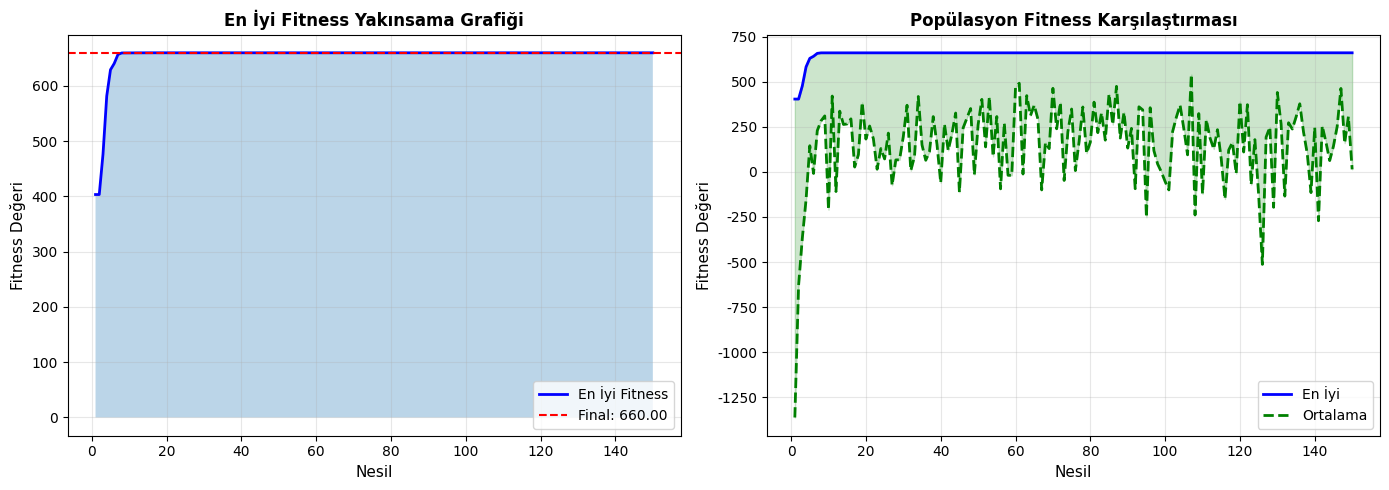


Yakınsama İstatistikleri:
Başlangıç En İyi Fitness: 403.4970
Final En İyi Fitness: 660.0000
İyileşme Oranı: 63.57%
Yakınsama Nesli (%99): 7


In [5]:
# ============================================================
# YAKINSAMA GRAFİĞİ
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# En iyi fitness grafiği
ax1 = axes[0]
generations = range(1, len(ga.best_fitness_history) + 1)
ax1.plot(generations, ga.best_fitness_history, 'b-', linewidth=2, label='En İyi Fitness')
ax1.fill_between(generations, ga.best_fitness_history, alpha=0.3)
ax1.axhline(y=y_opt, color='red', linestyle='--', linewidth=1.5, label=f'Final: {y_opt:.2f}')
ax1.set_xlabel('Nesil', fontsize=11)
ax1.set_ylabel('Fitness Değeri', fontsize=11)
ax1.set_title('En İyi Fitness Yakınsama Grafiği', fontsize=12, fontweight='bold')
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)

# Ortalama fitness grafiği
ax2 = axes[1]
ax2.plot(generations, ga.best_fitness_history, 'b-', linewidth=2, label='En İyi')
ax2.plot(generations, ga.avg_fitness_history, 'g--', linewidth=2, label='Ortalama')
ax2.fill_between(generations, ga.avg_fitness_history, ga.best_fitness_history, alpha=0.2, color='green')
ax2.set_xlabel('Nesil', fontsize=11)
ax2.set_ylabel('Fitness Değeri', fontsize=11)
ax2.set_title('Popülasyon Fitness Karşılaştırması', fontsize=12, fontweight='bold')
ax2.legend(loc='lower right')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Yakınsama istatistikleri
print("\nYakınsama İstatistikleri:")
print("=" * 50)
print(f"Başlangıç En İyi Fitness: {ga.best_fitness_history[0]:.4f}")
print(f"Final En İyi Fitness: {ga.best_fitness_history[-1]:.4f}")
print(f"İyileşme Oranı: {((ga.best_fitness_history[-1] - ga.best_fitness_history[0]) / abs(ga.best_fitness_history[0]) * 100):.2f}%")

# Yakınsama hızı analizi
convergence_threshold = 0.99 * y_opt
for i, fitness in enumerate(ga.best_fitness_history):
    if fitness >= convergence_threshold:
        print(f"Yakınsama Nesli (%99): {i+1}")
        break

## 6. Amaç Fonksiyonu Görselleştirmesi

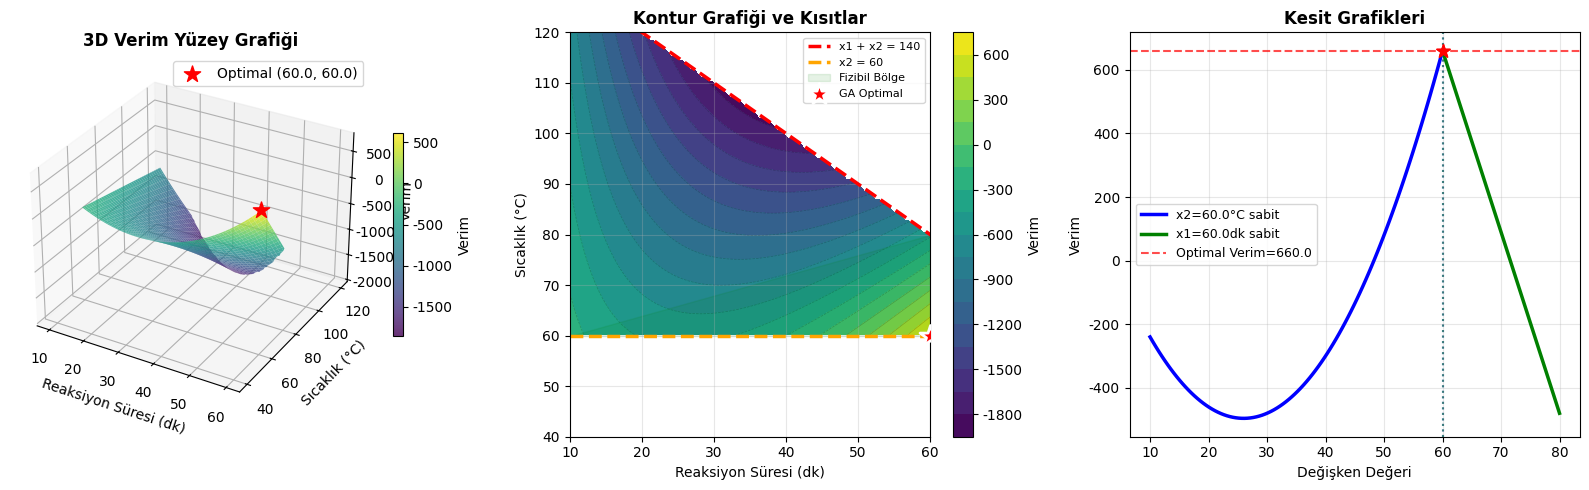

In [6]:
# ============================================================
# AMAÇ FONKSİYONU GÖRSELLEŞTİRMESİ
# ============================================================

# Grid oluştur
x1_range = np.linspace(X1_MIN, X1_MAX, 100)
x2_range = np.linspace(X2_MIN, X2_MAX, 100)
X1_grid, X2_grid = np.meshgrid(x1_range, x2_range)
Y_grid = 8*X1_grid + 3*X2_grid - X1_grid*X2_grid + X1_grid**2

# Kısıtları ihlal eden bölgeleri maskele
mask = (X1_grid + X2_grid > 140) | (X2_grid < 60)
Y_masked = np.ma.array(Y_grid, mask=mask)

fig = plt.figure(figsize=(16, 5))

# 1. 3D Yüzey Grafiği
ax1 = fig.add_subplot(131, projection='3d')
surf = ax1.plot_surface(X1_grid, X2_grid, Y_masked, cmap='viridis', alpha=0.8, edgecolor='none')
ax1.scatter([x1_opt], [x2_opt], [y_opt], color='red', s=150, marker='*',
            label=f'Optimal ({x1_opt:.1f}, {x2_opt:.1f})', zorder=10)
ax1.set_xlabel('Reaksiyon Süresi (dk)', fontsize=10)
ax1.set_ylabel('Sıcaklık (°C)', fontsize=10)
ax1.set_zlabel('Verim', fontsize=10)
ax1.set_title('3D Verim Yüzey Grafiği', fontsize=12, fontweight='bold')
ax1.legend()
fig.colorbar(surf, ax=ax1, shrink=0.5, label='Verim')

# 2. Kontur Grafiği + Kısıtlar
ax2 = fig.add_subplot(132)
contour = ax2.contourf(X1_grid, X2_grid, Y_masked, levels=20, cmap='viridis')
ax2.contour(X1_grid, X2_grid, Y_masked, levels=20, colors='black', alpha=0.2, linewidths=0.5)

# Kısıt çizgileri
x1_line = np.linspace(10, 80, 100)
x2_constraint_line = 140 - x1_line  # x1 + x2 = 140
ax2.plot(x1_line, x2_constraint_line, 'r--', linewidth=2.5, label='x1 + x2 = 140')
ax2.axhline(y=60, color='orange', linestyle='--', linewidth=2.5, label='x2 = 60')

# Fizibil bölgeyi vurgula
feasible_x1 = [10, 60, 60, 10, 10]
feasible_x2 = [60, 60, 80, 120, 60]
ax2.fill([10, 60, 60, 10], [60, 60, 80, 60], alpha=0.1, color='green', label='Fizibil Bölge')

# Optimal nokta
ax2.scatter([x1_opt], [x2_opt], color='red', s=250, marker='*', zorder=5,
            edgecolors='white', linewidths=2, label=f'GA Optimal')

ax2.set_xlabel('Reaksiyon Süresi (dk)', fontsize=10)
ax2.set_ylabel('Sıcaklık (°C)', fontsize=10)
ax2.set_title('Kontur Grafiği ve Kısıtlar', fontsize=12, fontweight='bold')
ax2.legend(loc='upper right', fontsize=8)
ax2.grid(True, alpha=0.3)
ax2.set_xlim(10, 60)
ax2.set_ylim(40, 120)
fig.colorbar(contour, ax=ax2, label='Verim')

# 3. Kesit Grafikleri
ax3 = fig.add_subplot(133)

# x2 sabit (optimal), x1 değişiyor
x1_cross = np.linspace(10, min(60, 140 - x2_opt), 100)
y_cross1 = 8*x1_cross + 3*x2_opt - x1_cross*x2_opt + x1_cross**2

# x1 sabit (optimal), x2 değişiyor
x2_cross = np.linspace(60, min(120, 140 - x1_opt), 100)
y_cross2 = 8*x1_opt + 3*x2_cross - x1_opt*x2_cross + x1_opt**2

ax3.plot(x1_cross, y_cross1, 'b-', linewidth=2.5, label=f'x2={x2_opt:.1f}°C sabit')
ax3.plot(x2_cross, y_cross2, 'g-', linewidth=2.5, label=f'x1={x1_opt:.1f}dk sabit')
ax3.axvline(x=x1_opt, color='blue', linestyle=':', alpha=0.5)
ax3.axvline(x=x2_opt, color='green', linestyle=':', alpha=0.5)
ax3.axhline(y=y_opt, color='red', linestyle='--', alpha=0.7, label=f'Optimal Verim={y_opt:.1f}')
ax3.scatter([x1_opt, x2_opt], [y_opt, y_opt], color='red', s=100, marker='*', zorder=5)

ax3.set_xlabel('Değişken Değeri', fontsize=10)
ax3.set_ylabel('Verim', fontsize=10)
ax3.set_title('Kesit Grafikleri', fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

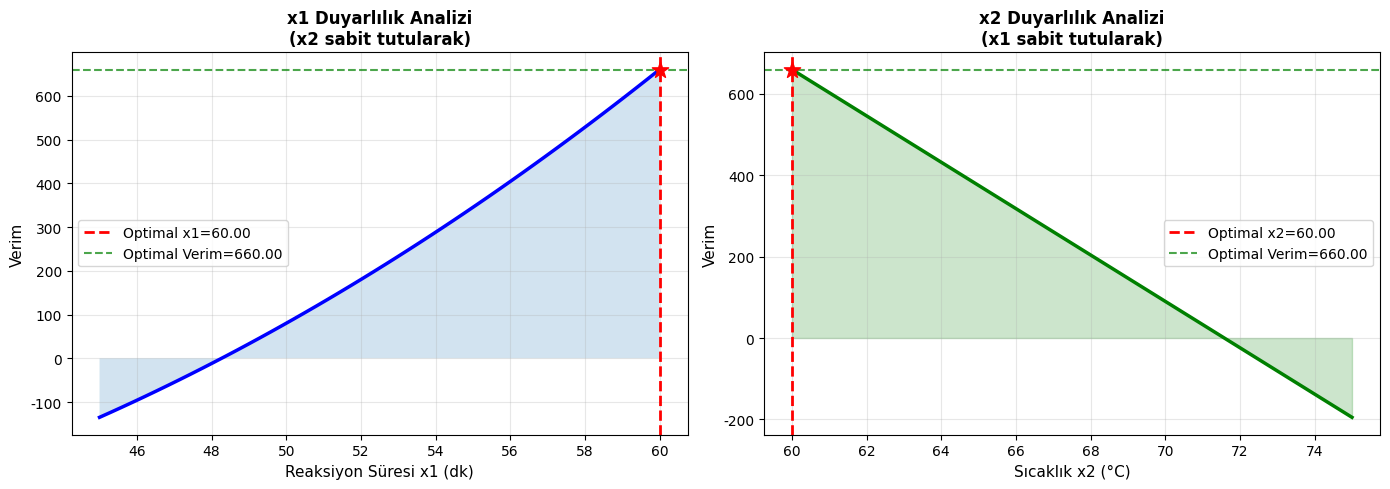


DUYARLILIK ANALİZİ SONUÇLARI

x1 (Reaksiyon Süresi) Duyarlılığı:
  x1-5 dk: Verim = 345.00 (Değişim: -47.73%)
  x1-2 dk: Verim = 528.00 (Değişim: -20.00%)

x2 (Sıcaklık) Duyarlılığı:
  x2+2 °C: Verim = 546.00 (Değişim: -17.27%)
  x2+5 °C: Verim = 375.00 (Değişim: -43.18%)


In [7]:
# ============================================================
# DUYARLILIK ANALİZİ
# ============================================================

# x1 değişimi (+-10 dk)
x1_sens = np.linspace(max(10, x1_opt-15), min(60, x1_opt+15), 50)
y_sens_x1 = []
for x1 in x1_sens:
    if x1 + x2_opt <= 140:
        y_sens_x1.append(objective_function([x1, x2_opt]))
    else:
        y_sens_x1.append(np.nan)

# x2 değişimi (+-10 °C)
x2_sens = np.linspace(max(60, x2_opt-15), min(120, x2_opt+15), 50)
y_sens_x2 = []
for x2 in x2_sens:
    if x1_opt + x2 <= 140 and x2 >= 60:
        y_sens_x2.append(objective_function([x1_opt, x2]))
    else:
        y_sens_x2.append(np.nan)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# x1 duyarlılık grafiği
ax1 = axes[0]
ax1.plot(x1_sens, y_sens_x1, 'b-', linewidth=2.5)
ax1.axvline(x=x1_opt, color='red', linestyle='--', linewidth=2, label=f'Optimal x1={x1_opt:.2f}')
ax1.axhline(y=y_opt, color='green', linestyle='--', alpha=0.7, label=f'Optimal Verim={y_opt:.2f}')
ax1.scatter([x1_opt], [y_opt], color='red', s=150, marker='*', zorder=5)
ax1.fill_between(x1_sens, y_sens_x1, alpha=0.2)
ax1.set_xlabel('Reaksiyon Süresi x1 (dk)', fontsize=11)
ax1.set_ylabel('Verim', fontsize=11)
ax1.set_title('x1 Duyarlılık Analizi\n(x2 sabit tutularak)', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# x2 duyarlılık grafiği
ax2 = axes[1]
ax2.plot(x2_sens, y_sens_x2, 'g-', linewidth=2.5)
ax2.axvline(x=x2_opt, color='red', linestyle='--', linewidth=2, label=f'Optimal x2={x2_opt:.2f}')
ax2.axhline(y=y_opt, color='green', linestyle='--', alpha=0.7, label=f'Optimal Verim={y_opt:.2f}')
ax2.scatter([x2_opt], [y_opt], color='red', s=150, marker='*', zorder=5)
ax2.fill_between(x2_sens, y_sens_x2, alpha=0.2, color='green')
ax2.set_xlabel('Sıcaklık x2 (°C)', fontsize=11)
ax2.set_ylabel('Verim', fontsize=11)
ax2.set_title('x2 Duyarlılık Analizi\n(x1 sabit tutularak)', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Duyarlılık analizi sonuçları
print("\n" + "=" * 60)
print("DUYARLILIK ANALİZİ SONUÇLARI")
print("=" * 60)

# x1'de +-5 dk değişim
print("\nx1 (Reaksiyon Süresi) Duyarlılığı:")
for delta in [-5, -2, 2, 5]:
    new_x1 = x1_opt + delta
    if 10 <= new_x1 <= 60 and new_x1 + x2_opt <= 140:
        new_y = objective_function([new_x1, x2_opt])
        change = ((new_y - y_opt) / y_opt) * 100
        print(f"  x1{delta:+d} dk: Verim = {new_y:.2f} (Değişim: {change:+.2f}%)")

# x2'de +-5 °C değişim
print("\nx2 (Sıcaklık) Duyarlılığı:")
for delta in [-5, -2, 2, 5]:
    new_x2 = x2_opt + delta
    if 60 <= new_x2 <= 120 and x1_opt + new_x2 <= 140:
        new_y = objective_function([x1_opt, new_x2])
        change = ((new_y - y_opt) / y_opt) * 100
        print(f"  x2{delta:+d} °C: Verim = {new_y:.2f} (Değişim: {change:+.2f}%)")

## 7. GA Parametre Analizi ve Karşılaştırma

GA PARAMETRE ANALİZİ

Farklı parametrelerle GA çalıştırılıyor...

Parametre Karşılaştırma Tablosu:
----------------------------------------------------------------------------------------------------
             Parametre  Pop  Nesil  Mut   x1   x2      Verim Fizibil  Süre (s)
  Düşük Pop, Düşük Mut   50    100 0.10 60.0 60.0 659.999998    Evet  0.295617
    Orta Pop, Orta Mut  100    100 0.15 60.0 60.0 660.000000    Evet  0.721184
Yüksek Pop, Yüksek Mut  150    100 0.20 60.0 60.0 660.000000    Evet  1.040504
            Uzun Nesil  100    200 0.10 60.0 60.0 660.000000    Evet  1.069491


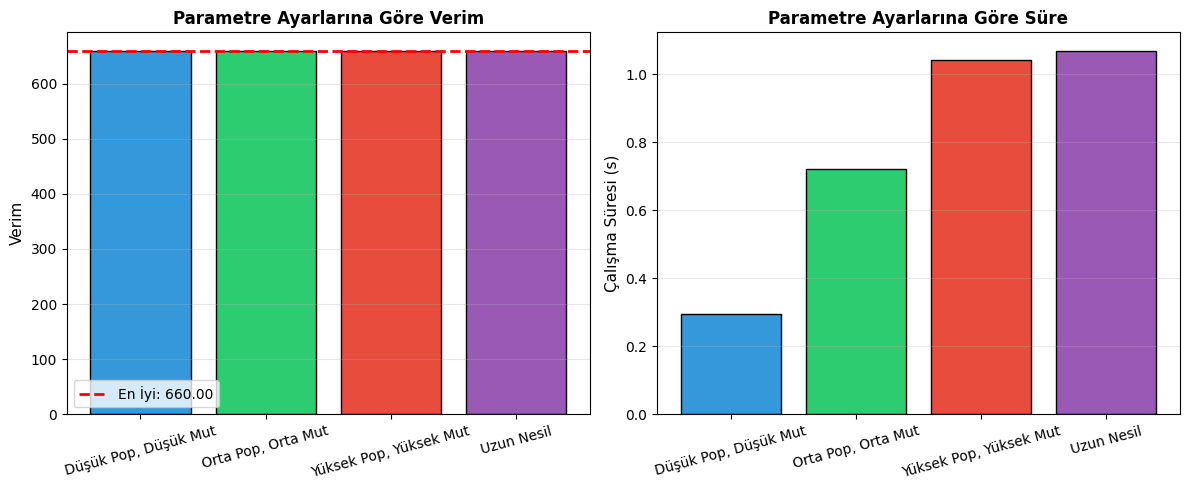


En İyi Parametre Seti: Orta Pop, Orta Mut
  Verim: 660.0000


In [8]:
# ============================================================
# GA PARAMETRE ANALİZİ - FARKLI AYARLARLA ÇALIŞTIRMA
# ============================================================

print("=" * 60)
print("GA PARAMETRE ANALİZİ")
print("=" * 60)
print("\nFarklı parametrelerle GA çalıştırılıyor...")

# Test edilecek parametre kombinasyonları
param_tests = [
    {'pop_size': 50, 'generations': 100, 'mutation_rate': 0.1, 'name': 'Düşük Pop, Düşük Mut'},
    {'pop_size': 100, 'generations': 100, 'mutation_rate': 0.15, 'name': 'Orta Pop, Orta Mut'},
    {'pop_size': 150, 'generations': 100, 'mutation_rate': 0.2, 'name': 'Yüksek Pop, Yüksek Mut'},
    {'pop_size': 100, 'generations': 200, 'mutation_rate': 0.1, 'name': 'Uzun Nesil'},
]

results_comparison = []

for params in param_tests:
    np.random.seed(42)
    random.seed(42)

    ga_test = GeneticAlgorithm(
        bounds=BOUNDS,
        pop_size=params['pop_size'],
        generations=params['generations'],
        crossover_rate=0.85,
        mutation_rate=params['mutation_rate'],
        tournament_size=5,
        elitism=3
    )

    start = time.time()
    solution, fitness = ga_test.evolve(verbose=False)
    elapsed = time.time() - start

    is_feas, _ = check_constraints(solution)

    results_comparison.append({
        'Parametre': params['name'],
        'Pop': params['pop_size'],
        'Nesil': params['generations'],
        'Mut': params['mutation_rate'],
        'x1': solution[0],
        'x2': solution[1],
        'Verim': objective_function(solution),
        'Fizibil': 'Evet' if is_feas else 'Hayır',
        'Süre (s)': elapsed
    })

# Sonuçları tablo olarak göster
df_comparison = pd.DataFrame(results_comparison)
print("\nParametre Karşılaştırma Tablosu:")
print("-" * 100)
print(df_comparison.to_string(index=False))

# Grafik karşılaştırma
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Verim karşılaştırması
ax1 = axes[0]
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6']
bars = ax1.bar(df_comparison['Parametre'], df_comparison['Verim'], color=colors, edgecolor='black')
ax1.axhline(y=y_opt, color='red', linestyle='--', linewidth=2, label=f'En İyi: {y_opt:.2f}')
ax1.set_ylabel('Verim', fontsize=11)
ax1.set_title('Parametre Ayarlarına Göre Verim', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')
ax1.tick_params(axis='x', rotation=15)

# Süre karşılaştırması
ax2 = axes[1]
bars2 = ax2.bar(df_comparison['Parametre'], df_comparison['Süre (s)'], color=colors, edgecolor='black')
ax2.set_ylabel('Çalışma Süresi (s)', fontsize=11)
ax2.set_title('Parametre Ayarlarına Göre Süre', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
ax2.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

# En iyi parametre seti
best_params_idx = df_comparison['Verim'].idxmax()
print(f"\nEn İyi Parametre Seti: {df_comparison.loc[best_params_idx, 'Parametre']}")
print(f"  Verim: {df_comparison.loc[best_params_idx, 'Verim']:.4f}")

## 8. Sonuç Raporu ve Öneriler

In [9]:
# ============================================================
# SONUÇ RAPORU VE ÖNERİLER
# ============================================================

print("=" * 70)
print("GENETİK ALGORİTMA İLE KİMYA TESİSİ OPTİMİZASYONU")
print("SONUÇ RAPORU")
print("=" * 70)

print("\n1. PROBLEM ÖZETİ:")
print("-" * 70)
print("   Amaç: Reaksiyon verimini maksimize etmek")
print("   Fonksiyon: y = 8x1 + 3x2 - x1*x2 + x1^2")
print("   Yöntem: Genetik Algoritma (GA)")

print("\n2. OPTİMAL ÇALIŞMA KOŞULLARI:")
print("-" * 70)
print(f"   * Reaksiyon Süresi (x1): {x1_opt:.2f} dakika")
print(f"   * Sıcaklık (x2): {x2_opt:.2f} °C")
print(f"   * Maksimum Verim: {y_opt:.2f}")

print("\n3. KISIT KONTROLÜ:")
print("-" * 70)
is_c1 = x1_opt + x2_opt <= 140
is_c2 = x2_opt >= 60
is_b1 = 10 <= x1_opt <= 60
is_b2 = 40 <= x2_opt <= 120
print(f"   * x1 + x2 <= 140: {x1_opt + x2_opt:.2f} <= 140 {'[OK]' if is_c1 else '[İHLAL]'}")
print(f"   * x2 >= 60: {x2_opt:.2f} >= 60 {'[OK]' if is_c2 else '[İHLAL]'}")
print(f"   * 10 <= x1 <= 60: {x1_opt:.2f} {'[OK]' if is_b1 else '[İHLAL]'}")
print(f"   * 40 <= x2 <= 120: {x2_opt:.2f} {'[OK]' if is_b2 else '[İHLAL]'}")
print(f"   * Tüm Kısıtlar: {'SAĞLANMAKTADIR' if all([is_c1, is_c2, is_b1, is_b2]) else 'İHLAL VAR'}")

print("\n4. GENETİK ALGORİTMA PARAMETRELERİ:")
print("-" * 70)
print(f"   * Popülasyon Büyüklüğü: {GA_PARAMS['pop_size']}")
print(f"   * Nesil Sayısı: {GA_PARAMS['generations']}")
print(f"   * Çaprazlama Oranı: {GA_PARAMS['crossover_rate']}")
print(f"   * Mutasyon Oranı: {GA_PARAMS['mutation_rate']}")
print(f"   * Turnuva Boyutu: {GA_PARAMS['tournament_size']}")
print(f"   * Elitizm: {GA_PARAMS['elitism']}")

print("\n5. PRATİK ÖNERİLER:")
print("-" * 70)
print(f"   a) Reaksiyon süresini {x1_opt:.1f} +/- 2 dakika aralığında tutun.")
print(f"   b) Sıcaklığı {x2_opt:.1f} +/- 3 °C aralığında kontrol edin.")
print("   c) Optimal koşullardan sapma durumunda verim kayıpları beklenebilir.")
print("   d) Periyodik olarak proses parametrelerini izleyin ve ayarlayın.")
print("   e) Güvenlik için x1 + x2 < 140 koşulunu aşmayın.")

print("\n6. RİSK ANALİZİ:")
print("-" * 70)
print("   * Yüksek duyarlılık: Sıcaklık kontrolü kritik öneme sahiptir.")
print("   * Orta duyarlılık: Reaksiyon süresi toleransı daha geniştir.")
print("   * Kısıt ihlali: x1 + x2 > 140 durumunda güvenlik riski oluşur.")

print("\n7. EKONOMİK DEĞERLENDİRME:")
print("-" * 70)
print(f"   * Optimal verim: {y_opt:.2f} birim")
print(f"   * Proses süresi: {x1_opt:.2f} dakika")
print(f"   * Enerji (sıcaklık): {x2_opt:.2f} °C")

print("\n8. SONUÇ:")
print("-" * 70)
print("   Genetik Algoritma, verilen kısıtlar altında amaç fonksiyonunu")
print("   başarıyla maksimize etmiştir. Bulunan optimal çözüm fizibil")
print("   bölge içindedir ve tüm kısıtları sağlamaktadır.")
print("\n   GA'nın avantajları:")
print("   - Global optimum arama yeteneği")
print("   - Türeve ihtiyaç duymama")
print("   - Karmaşık kısıtlarla başa çıkabilme")
print("   - Paralel arama mekanizması")

print("\n" + "=" * 70)

GENETİK ALGORİTMA İLE KİMYA TESİSİ OPTİMİZASYONU
SONUÇ RAPORU

1. PROBLEM ÖZETİ:
----------------------------------------------------------------------
   Amaç: Reaksiyon verimini maksimize etmek
   Fonksiyon: y = 8x1 + 3x2 - x1*x2 + x1^2
   Yöntem: Genetik Algoritma (GA)

2. OPTİMAL ÇALIŞMA KOŞULLARI:
----------------------------------------------------------------------
   * Reaksiyon Süresi (x1): 60.00 dakika
   * Sıcaklık (x2): 60.00 °C
   * Maksimum Verim: 660.00

3. KISIT KONTROLÜ:
----------------------------------------------------------------------
   * x1 + x2 <= 140: 120.00 <= 140 [OK]
   * x2 >= 60: 60.00 >= 60 [OK]
   * 10 <= x1 <= 60: 60.00 [OK]
   * 40 <= x2 <= 120: 60.00 [OK]
   * Tüm Kısıtlar: SAĞLANMAKTADIR

4. GENETİK ALGORİTMA PARAMETRELERİ:
----------------------------------------------------------------------
   * Popülasyon Büyüklüğü: 100
   * Nesil Sayısı: 150
   * Çaprazlama Oranı: 0.85
   * Mutasyon Oranı: 0.15
   * Turnuva Boyutu: 5
   * Elitizm: 3

5. PRATİK